In [102]:
import pandas as pd

In [103]:
rankings = pd.read_csv('data/final_rankings.csv')

In [104]:
df_transformed_transformed_main = pd.read_csv('data/SAP Datasets.csv')

C:\Users\06pau\AppData\Local\Temp\ipykernel_11116\553503645.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transformed_transformed_main = pd.read_csv('data/SAP Datasets.csv')


In [105]:
# Forward and backward filling
years_col = [str(i) for i in range(2000,2024)]
df_main[years_col] = df_main[years_col].apply(lambda row: row.ffill().bfill(), axis=1)

In [106]:
df_new = df_main[['Country Name', 'Country Code', 'Indicator Name', 'Topic', 'Indicator Code',
       'Unit of measure', '2022','2023']]

In [107]:
df_new = df_new.merge(rankings, on='Country Name', how='left')

In [108]:
df_new = df_new[~df_new['Indicator Name'].isin(['Population, total'])]

In [109]:
df_transformed = df_new.pivot(index=['Country Name', 'Country Code', 'mean_rank','rank'], columns='Indicator Name', values=['2022', '2023'])
df_transformed.columns = [f'{year}_{indicator}' for year, indicator in df_transformed.columns]
df_transformed.reset_index(inplace=True)

In [110]:
df_transformed.to_csv('df_transformed.csv', index=False)

In [111]:
df_transformed

,Country Name,Country Code,mean_rank,rank,2022_Access to clean fuels and technologies for cooking (% of population),"2022_Access to clean fuels and technologies for cooking, rural (% of rural population)","2022_Access to clean fuels and technologies for cooking, urban (% of urban population)",2022_Access to electricity (% of population),"2022_Access to electricity, rural (% of rural population)","2022_Access to electricity, urban (% of urban population)",...,2023_Unemployment with basic education (% of total labor force with basic education),2023_Unemployment with intermediate education (% of total labor force with intermediate education),"2023_Unemployment, total (% of total labor force) (national estimate)",2023_Urban population (% of total population),"2023_Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","2023_Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","2023_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",2023_Wanted fertility rate (births per woman),2023_Women who were first married by age 15 (% of women ages 20-24),2023_Women who were first married by age 18 (% of women ages 20-24)
0,Afghanistan,AFG,91.966504,226,36.100000,18.500000,85.000000,85.300000,81.700000,95.900000,...,6.754000,8.879000,5.679000,26.933000,8.878202,18.841205,18.259346,4.400000,9.6,28.7
1,Africa Eastern and Southern,AFE,135.600571,261,21.863139,9.261320,41.011132,48.711995,33.747907,75.922121,...,NaN,NaN,NaN,38.335337,20.164671,29.393837,25.069640,NaN,NaN,NaN
2,Africa Western and Central,AFW,120.850325,253,22.319404,6.709029,42.019407,55.437577,25.226198,86.685517,...,2.429684,5.261144,3.031437,49.635410,13.838867,20.440624,17.564789,4.466846,NaN,NaN
3,Albania,ALB,50.659578,85,84.600000,69.000000,94.500000,100.000000,100.000000,100.000000,...,10.109000,13.279000,11.474000,64.603000,49.573476,45.277198,47.177277,1.600000,1.4,11.8
4,Algeria,DZA,51.366593,87,99.700000,98.900000,99.900000,100.000000,99.300000,100.000000,...,10.930000,11.260000,12.000000,75.268000,74.032838,67.930374,68.978348,NaN,0.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,PSE,57.061345,111,NaN,NaN,NaN,100.000000,100.000000,100.000000,...,21.603000,24.009000,24.420000,77.582000,77.067218,75.990584,76.172663,NaN,0.7,13.4
262,World,WLD,94.292994,233,73.843840,54.505338,88.967223,91.352571,83.986540,97.664546,...,NaN,NaN,6.206632,57.337162,53.091130,51.253073,51.981562,NaN,NaN,NaN
263,"Yemen, Rep.",YEM,75.069671,175,48.300000,26.300000,87.600000,76.000000,65.000000,96.100000,...,12.753000,17.298000,13.467000,39.831000,34.451113,46.293400,45.522387,3.100000,6.5,29.6
264,Zambia,ZMB,81.969314,195,9.000000,2.200000,16.600000,47.800000,14.500000,87.000000,...,4.470000,11.044000,5.995000,46.335000,17.620527,34.436990,26.980686,4.000000,5.2,29.0


The `df_transformed` DataFrame is a transformed version of the `df_new` DataFrame. Here is a detailed description:

### Shape of Data
- The `df_transformed` DataFrame has 266 rows and 178 columns.

### List of Columns
The columns in `df_transformed` include:
- `Country Name`
- `Country Code`
- `mean_rank`
- `rank`
- Various columns representing indicators for the years 2022 and 2023. Each indicator is prefixed with the year, followed by the indicator name. For example:
    - `2022_Access to clean fuels and technologies for cooking (% of population)`
    - `2023_Access to clean fuels and technologies for cooking (% of population)`
    - `2022_Access to electricity (% of population)`
    - `2023_Access to electricity (% of population)`
    - And many more...

### How It Was Created
1. **Initial DataFrames**:
     - `df_main`: Loaded from 'data/SAP Datasets.csv'.
     - `rankings`: Loaded from 'data/final_rankings.csv'.

2. **Forward and Backward Filling**:
     - The columns representing years from 2000 to 2023 in `df_main` were forward and backward filled to handle missing values.

3. **Selection of Specific Columns**:
     - A subset of columns was selected from `df_main` to create `df_new`.

4. **Merging with Rankings**:
     - `df_new` was merged with the `rankings` DataFrame on the 'Country Name' column using a left join.

5. **Filtering Out Specific Indicators**:
     - Rows with the 'Indicator Name' as 'Population, total' were filtered out from `df_new`.

6. **Pivoting the DataFrame**:
     - `df_new` was pivoted to create `df_transformed`, with 'Country Name', 'Country Code', 'mean_rank', and 'rank' as the index, and the 'Indicator Name' as columns. The values were taken from the years 2022 and 2023.
     - The columns were then renamed to include both the year and the indicator name.
     - The index was reset to convert the multi-index DataFrame back to a regular DataFrame.

7. **Saving to CSV**:
     - The `df_transformed` DataFrame was saved to 'df_transformed.csv'.

### Summary
The `df_transformed` DataFrame provides a comprehensive view of various indicators for different countries, with data for the years 2022 and 2023. It includes rankings and mean ranks for each country, along with a wide range of socio-economic and environmental indicators.

In [112]:
X = df_transformed.drop(columns=["Country Name", "Country Code", "mean_rank", "rank"])
y = df_transformed["mean_rank"]  # Target variable


In [113]:
y_rank=df_transformed['rank']

In [114]:
df = df_transformed[['Country Name','mean_rank']]

C:\Users\06pau\AppData\Local\Temp\ipykernel_11116\3062322245.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_rank'] = imputer.fit_transform(df[['mean_rank']])


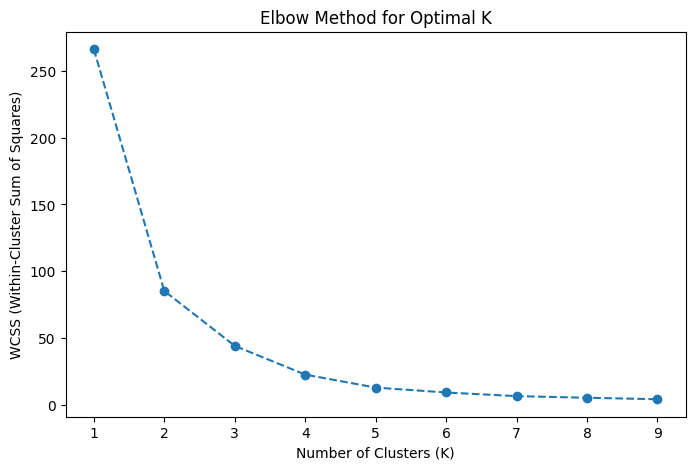

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values by filling them with the mean of the column
imputer = SimpleImputer(strategy='mean')
df['mean_rank'] = imputer.fit_transform(df[['mean_rank']])

# Scale the data (K-Means is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['mean_rank']])

# Find the optimal K using Elbow Method
wcss = []
K_range = range(1, 10)  # Test clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Sum of squared distances

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [116]:
# Apply K-Means with the optimal K (adjust based on the elbow point)
optimal_k = 2  # Replace with the best K from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Sort for better readability
df = df.sort_values(by="Cluster")

print(df[['Country Name', 'mean_rank', 'Cluster']])


                                          Country Name  mean_rank  Cluster
0                                          Afghanistan  91.966504        0
131                          Late-demographic dividend  72.655162        0
264                                             Zambia  81.969314        0
133  Latin America & Caribbean (excluding high income)  73.743898        0
134  Latin America & the Caribbean (IDA & IBRD coun...  74.486196        0
..                                                 ...        ...      ...
94                                                Guam  57.245235        1
163                                            Moldova  52.963260        1
164                                             Monaco  43.509490        1
157                                             Mexico  48.238260        1
32                                            Bulgaria  54.097244        1

[266 rows x 3 columns]


C:\Users\06pau\AppData\Local\Temp\ipykernel_11116\3926840920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


In [117]:
df_transformed['cluster'] = df_transformed.merge(df[['Country Name', 'Cluster']], on='Country Name', how='left')['Cluster']

In [118]:
# # Sort the DataFrame by 'rank'
# df_transformed_sorted = df_transformed.sort_values(by='rank')

# # Divide the DataFrame into 3 groups
# df_transformed_sorted['group'] = pd.qcut(df_transformed_sorted['rank'], q=3, labels=[1, 2, 3])

# # Display the DataFrame with the new 'group' column
# df_transformed_sorted

In [119]:
df_transformed.groupby(['cluster']).size()

cluster
0    113
1    153
dtype: int64

In [120]:
df_transformed.to_csv('df_transformed_exported.csv', index=False)

In [67]:
df_transformed

,Country Name,Country Code,mean_rank,rank,2022_Access to clean fuels and technologies for cooking (% of population),"2022_Access to clean fuels and technologies for cooking, rural (% of rural population)","2022_Access to clean fuels and technologies for cooking, urban (% of urban population)",2022_Access to electricity (% of population),"2022_Access to electricity, rural (% of rural population)","2022_Access to electricity, urban (% of urban population)",...,2023_Unemployment with intermediate education (% of total labor force with intermediate education),"2023_Unemployment, total (% of total labor force) (national estimate)",2023_Urban population (% of total population),"2023_Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","2023_Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","2023_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",2023_Wanted fertility rate (births per woman),2023_Women who were first married by age 15 (% of women ages 20-24),2023_Women who were first married by age 18 (% of women ages 20-24),cluster
0,Afghanistan,AFG,91.966504,226,36.100000,18.500000,85.000000,85.300000,81.700000,95.900000,...,8.879000,5.679000,26.933000,8.878202,18.841205,18.259346,4.400000,9.6,28.7,2
1,Africa Eastern and Southern,AFE,135.600571,261,21.863139,9.261320,41.011132,48.711995,33.747907,75.922121,...,NaN,NaN,38.335337,20.164671,29.393837,25.069640,NaN,NaN,NaN,0
2,Africa Western and Central,AFW,120.850325,253,22.319404,6.709029,42.019407,55.437577,25.226198,86.685517,...,5.261144,3.031437,49.635410,13.838867,20.440624,17.564789,4.466846,NaN,NaN,0
3,Albania,ALB,50.659578,85,84.600000,69.000000,94.500000,100.000000,100.000000,100.000000,...,13.279000,11.474000,64.603000,49.573476,45.277198,47.177277,1.600000,1.4,11.8,1
4,Algeria,DZA,51.366593,87,99.700000,98.900000,99.900000,100.000000,99.300000,100.000000,...,11.260000,12.000000,75.268000,74.032838,67.930374,68.978348,NaN,0.0,3.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,PSE,57.061345,111,NaN,NaN,NaN,100.000000,100.000000,100.000000,...,24.009000,24.420000,77.582000,77.067218,75.990584,76.172663,NaN,0.7,13.4,1
262,World,WLD,94.292994,233,73.843840,54.505338,88.967223,91.352571,83.986540,97.664546,...,NaN,6.206632,57.337162,53.091130,51.253073,51.981562,NaN,NaN,NaN,2
263,"Yemen, Rep.",YEM,75.069671,175,48.300000,26.300000,87.600000,76.000000,65.000000,96.100000,...,17.298000,13.467000,39.831000,34.451113,46.293400,45.522387,3.100000,6.5,29.6,2
264,Zambia,ZMB,81.969314,195,9.000000,2.200000,16.600000,47.800000,14.500000,87.000000,...,11.044000,5.995000,46.335000,17.620527,34.436990,26.980686,4.000000,5.2,29.0,2


In [87]:
# ## Feature selection with random forest
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Define Features (X) and Target (y)
# X = df_transformed.drop(columns=["Country Name", "Country Code", "cluster"])  # Features
# y = df_transformed["cluster"]  # Target (Cluster groups)

# # Train Random Forest Classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y)

# # Get Feature Importances
# importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Plot Top 20 Important Features
# plt.figure(figsize=(10, 6))
# importances[:20].plot(kind="barh", color="teal")
# plt.xlabel("Feature Importance Score")
# plt.title("Top 20 Important Features for Clustering")
# plt.gca().invert_yaxis()
# plt.show()

# # Print Top 10 Features
# print(importances.head(10))
